In [117]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import os

import statsmodels.api as sm

In [35]:
data_1 = np.random.normal(0, 2, 100),
data_2 = np.random.normal(100, 3, 100)

In [46]:
a = 100-np.random.exponential(scale=10.0, size=10000)
b = np.random.exponential(scale=10.0, size=10000)

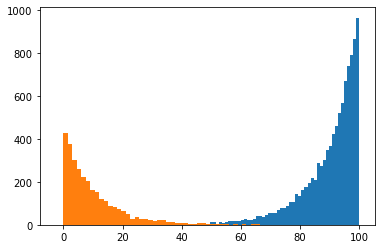

In [30]:
_ = plt.hist(a, bins='auto')
_ = plt.hist(b, bins='auto')
plt.show()

In [505]:
n = 10000
right_peak = 100-np.random.exponential(scale=10.0, size=n).reshape((n,1))
left_peak = np.random.exponential(scale=10.0, size=n).reshape((n,1))
middle_peak = np.random.normal(loc=50.0, scale=8.0, size=n).reshape((n,1))
draw = np.random.multinomial(n=1, pvals=[0.25, 0.2, 0.55], size=n)

In [514]:
def get_draw(rand, data_row):
    if rand[0]==1:
        return data_row[0]
    if rand[1]==1:
        return data_row[1]
    if rand[2]==1:
        return data_row[2]

raw = np.concatenate((left_peak,middle_peak,right_peak), axis=1)
data = []
for i in range(n):
    data.append(get_draw(rand=draw[i,:], data_row=raw[i,:]))
   
data = np.asarray(data)
data = data[data <= 100]
data = data[data >= 0]

#_ = plt.hist(data, bins='auto')
#plt.show()

In [515]:
X.shape

(3402, 73)

In [516]:
mod = sm.OLS(endog= data[0:(X.shape[0])], exog = X)
res = mod.fit()
y_hat = X @ res.params.reshape((len(res.params),1))

In [496]:
dat = get_real_data_dgp(rel_path= os.path.abspath("../..") + "/bld/data/sparse_modelling_df_add_profession_no_add_political_no.csv", january=True, sd=1.0)

In [521]:
X = pd.DataFrame(dat["X"])

Q1 = X.quantile(0.001)
Q3 = X.quantile(0.999)
IQR = Q3 - Q1

thresh = 80
X_cut = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]
y = dat["y_true"][~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]
X = X_cut.to_numpy()

X_up = X[y > thresh,:]
y_up = y[y > thresh]

# y = dat["y_true"][((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR)))]
#y_random = data[0:(X.shape[0])]

In [522]:
from statsmodels.graphics.gofplots import qqplot

In [523]:
y_adj = y / 100

for i, val in enumerate(y_adj):
    if val == 0:
        y_adj[i] += 0.01
    if val == 1:
        y_adj[i] -= 0.01
        
y_adj = np.log(y_adj)

In [524]:
#mod = sm.OLS(endog= y_up, exog = X_up)
mod = sm.OLS(endog= y, exog = X)
res = mod.fit()
y_hat = X @ res.params.reshape((len(res.params),1))

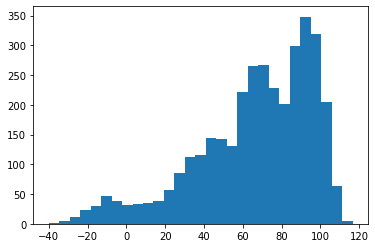

In [525]:
_ = plt.hist(y_hat, bins='auto')
plt.show()

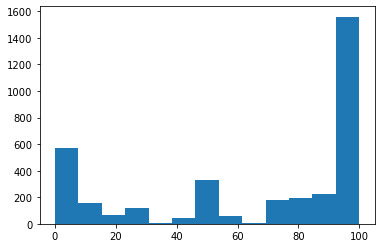

In [491]:
_ = plt.hist(y, bins='auto')
plt.show()

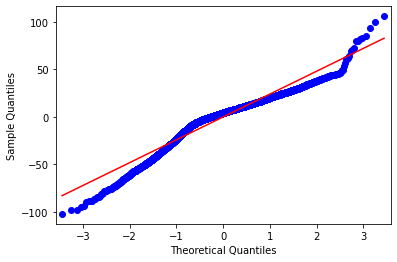

In [493]:
qqplot(res.resid, line='s')
plt.show()

In [143]:
res.resid

(3402,)

In [140]:
y_hat = X.to_numpy() @ res.params

In [111]:
def get_real_data_dgp(rel_path, january=True, sd=1.0):
    data = pd.read_csv(rel_path)
    data = data.drop(["personal_id"], axis=1)

    if january:
        y = data[["vaccine_intention_jan"]]
        X = data.drop(["vaccine_intention_jan", "vaccine_intention_jul"], axis=1)
    else:
        y = data[["vaccine_intention_jul"]]
        X = data.drop(["vaccine_intention_jan", "vaccine_intention_jul"], axis=1)

    y_true_numpy = y.to_numpy().flatten()
    X_numpy = X.to_numpy()

    n, p = X_numpy.shape

    # create random beta_vec
    active_set = np.concatenate(
        (np.repeat(4, 1), np.repeat(-4, 1), np.repeat(1, 2), np.repeat(-1, 2), np.repeat(0.4, 5), np.repeat(0.1, 5))
    )
    inactive_set = np.zeros(p - len(active_set))

    mixed_set = np.concatenate((active_set, inactive_set))
    np.random.shuffle(mixed_set)
    support = np.invert(np.isclose(np.zeros(p), mixed_set, atol=1e-06))
    beta = mixed_set.reshape((p, 1))

    y_artificial = X_numpy @ beta + np.random.normal(loc=0.0, scale=sd, size=n)
    y_artificial = y_artificial.flatten()

    return {
        "X": X_numpy,
        "y_true": y_true_numpy,
        "y_artificial": y_artificial,
        "beta": beta,
        "support": support,
    }

In [73]:
data.shape

(3, 0)

In [87]:
a

array([[98.54659386],
       [99.95998652],
       [98.51042091],
       [90.11815285],
       [99.08613001],
       [94.28458247],
       [94.63385432],
       [86.76141739],
       [89.01355847],
       [92.48281679],
       [87.01885645],
       [88.30036252],
       [91.57878677],
       [76.75997424],
       [82.20111001],
       [92.19808008],
       [95.72335138],
       [73.41434697],
       [93.19383257],
       [93.26347726],
       [85.17772602],
       [87.34831609],
       [88.59652525],
       [61.8719401 ],
       [94.60338397],
       [92.97828231],
       [99.42115448],
       [92.12476764],
       [84.85329162],
       [92.8442748 ],
       [69.65406749],
       [97.20799333],
       [94.8374619 ],
       [94.58448489],
       [99.14348098],
       [98.5634322 ],
       [88.09800482],
       [97.38053978],
       [96.23619284],
       [89.91149891],
       [95.54225066],
       [81.96586045],
       [95.37817278],
       [99.1430766 ],
       [95.54563061],
       [98